# NILS VAN DER KEMP, 55612

# Advanced Data Analysis - Assignment 3

This notebook contains the proposed solution for **Assignment 3** of the Advanced Data Analysis course.


### DEADLINE: 9-November-2022

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* The notebook should be delivered with the outputs already available


# Group I 

Nowadays, industry players are using product quality certifications to promote their products.
Vital factor in red wine certification and quality assessment is physicochemical tests, which
are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical
properties. We would like to determine which feature(s) can be used regression that
best predicts the quality red wine.

Structure of the dataset:
Input variables (based on physicochemical tests):
- Fixed Acidity: Most acids involved with wine or fixed or non-volatile (do not evaporate readily)
- Volatile Acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- Citric Acid: Often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes
- Residual Sugar: From the natural grape sugars left in a wine after the alcoholic fermentation finishes.
- Chlorides: The amount of salt in the wine
- Free Sulfur Dioxide: It prevents microbial growth and the oxidation of wine
- Total Sulfur Dioxide: The amount of free + bound forms of SO₂
- Density: Sweeter wines have a higher density
- pH: Describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale
- Alcohol: Available in small quantities in wines makes the drinkers sociable
- Sulphates: A wine additive that contributes to SO₂ levels and acts as an antimicrobial and antioxidant
- Quality: which is the output variable/predictor

The dataset source is taken from https://archive.ics.uci.edu/ml/datasets/wine+quality.


In [137]:
# This code cell does not need to be changed
import os
import pandas as pd
from sklearn import linear_model

dataFileName = "winequality-red.csv"
dataDF = pd.read_csv(dataFileName)

dataDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Question 1 (1 point out of 20)

Identify the variables that are more linearly correlated with the quality of red wine

In [138]:
# create cross table, showing the correlations between all variables
corr_table = dataDF.corr()

# add a column with the absolute correlation values of all correlations with quality
corr_table["abs_quality"] = corr_table["quality"].abs()

# display all correlations with quality, descendingly sorted by the absolute correlation values
display(pd.DataFrame(corr_table.sort_values("abs_quality", ascending = False)["quality"]))

,quality
quality,1.000000
alcohol,0.476166
volatile acidity,-0.390558
sulphates,0.251397
citric acid,0.226373
total sulfur dioxide,-0.185100
density,-0.174919
chlorides,-0.128907
fixed acidity,0.124052
pH,-0.057731


## Question 2 ( 2 points out of 20)

Estimate the true error of a model that uses the top 4 variables more correlated with the quality of red wine

In [139]:
from sklearn.model_selection import cross_val_score

# write a function to get the negative mean squared error of a model
def regression(input, quality):
    model = linear_model.LinearRegression()
    return -1 * cross_val_score(model, input, quality, scoring = "neg_mean_squared_error", cv = 10).mean()

# apply this function to the dataframe, using the 4 highest correlated variables as input values
test_error = regression(dataDF[["alcohol", "volatile acidity", "sulphates", "citric acid"]], dataDF[["quality"]])
print("Estimated true error (test error): {0}".format(test_error))

Estimated true error (test error): 0.4439518038537466


## Question 3 ( 4 points out of 20)

Evaluate two other models of your choice and compare/discuss their expected errors? (explain your criteria for each model tested)

**Model selection:** I want to check the influence of transferring the model to a higher degree and of the number of correlated variables used for the model. Therefore, I build a Simple Linear Regression Model and a Polynomial Linear Regression Model, both using only the highest correlated variable "alcohol" and compare these models to the Multiple Linear Regression Model from Question 2. To decide, which degree to use best for the Polynomial Model, I first look for the degree with the lowest test error in the following.

In [140]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import sklearn

# create a dataframe with degrees 1 to 10
one_to_ten = pd.DataFrame({"degree" : range(1, 11)})

# write a function to define the input data, used to fit the Polynomial Linear Regression Model
def trans_data_plr(degree):
    polynomial_features = PolynomialFeatures(degree)
    poly_trans = polynomial_features.fit_transform(dataDF[["alcohol"]])
    input_df = pd.DataFrame(poly_trans)
    return input_df

model = linear_model.LinearRegression()

# append the dataframe with the negative mean squared error per degree, transform it into a positive value and display the lowest error
one_to_ten["test_error"] = one_to_ten["degree"].apply(lambda x: cross_val_score(model, trans_data_plr(x), dataDF[["quality"]], scoring = "neg_mean_squared_error", cv = 10).mean())
one_to_ten["test_error"] = one_to_ten["test_error"]*-1
print("Degree with lowest test error in Polynomial Linear Regression:")
display(one_to_ten.sort_values("test_error").head(1))

Degree with lowest test error in Polynomial Linear Regression:


,degree,test_error
2,3,0.507529


In [141]:
# show the error of the Multiple Linear Regression Model from Question 2 again
test_error_ml = regression(dataDF[["alcohol", "volatile acidity", "sulphates", "citric acid"]], dataDF[["quality"]])
print("Estimated true error (test error) with Multiple Linear Regression: {0}".format(test_error_ml))

# show the error of the Simple Linear Regression Model
test_error_sl = regression(dataDF[["alcohol"]], dataDF[["quality"]])
print("Estimated true error (test error) with Simple Linear Regression: {0}".format(test_error_sl))

# define the degree used in the Polynomial Regression
polynomial_features = PolynomialFeatures(degree = 3)

# calculate and show the individual test errors of both models
test_error_sp = regression(polynomial_features.fit_transform(dataDF[["alcohol"]]), dataDF[["quality"]])
print("Estimated true error (test error) with Polynomial Linear Regression (3rd degree): {0}".format(test_error_sp))

Estimated true error (test error) with Multiple Linear Regression: 0.4439518038537466
Estimated true error (test error) with Simple Linear Regression: 0.5101707592498947
Estimated true error (test error) with Polynomial Linear Regression (3rd degree): 0.5075293412261697


**Evaluation:** As a result, you can see that in this case, the influence of the amount of variables used is higher than the influence of the degree used. Even the Polynomial Linear Regression Model with the best degree shows a much greater error than Multiple Linear Regression with the top-4 highest correlated variables. Compared to the Simple Linear Regression, the 3rd degree Polynomial error is at least slightly lower.

## Question 4 ( 3 points out of 20)

Based on the best model identified previously, build a final model, report the formula (coefficients found) and evaluate it. On average, how far is your predictions from the actual values?

In [142]:
from sklearn.model_selection import train_test_split

# build a final model by splitting the data into train and test data
train_set, test_set = train_test_split(dataDF, test_size = 0.2, random_state = 10)
model = linear_model.LinearRegression()
model.fit(train_set[["alcohol", "volatile acidity", "sulphates", "citric acid"]], train_set[["quality"]])

# print the model's coefficients and the intercept
print("Coefficients: {0}, Intercept: {1}".format(model.coef_, model.intercept_))

# compute and print the average difference between the predictions and actual values
y_pred_test = model.predict(test_set[["alcohol", "volatile acidity", "sulphates", "citric acid"]])
diff = (test_set[["quality"]] - y_pred_test).abs().mean()
print("Average difference between predictions and actual values:", diff[0])

Coefficients: [[ 0.29578431 -1.39079778  0.60425558 -0.168485  ]], Intercept: [2.92287815]
Average difference between predictions and actual values: 0.5360662651119387


# Group II

The file internet.csv contains the estimated number of internet users (in millions) for each year from 1995
through 2012. For answering the following questions, you can use or adapt any code from the lectures or exercises
if you want.


In [143]:
dataFileName = "internet.csv"
dataDF = pd.read_csv(dataFileName)

In [144]:
dataset_df = pd.DataFrame()
dataset_df['year'] = dataDF.index
dataset_df['n_users'] = dataDF['n_users']
dataset_df.head()

,year,n_users
0,0,16
1,1,36
2,2,70
3,3,147
4,4,248


## Question 1 (5 points out of 20)

In lecture 6, we used the logistic function with an offset parameter to better fit the curve to some arbitrary starting point:

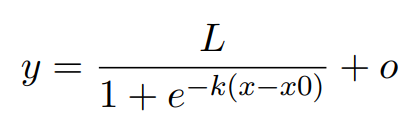

Fit this model to the data and show to the plots of the data and the curve predicted by the
model. Additionally, display the parameters found for the logistic model and explain the meaning of each one.  

Note: I suggest you use these starting values for the minimization: L = 1000, x0 = 10, k = 0.1 and
o = −300. If you use other values the minimization may not converge properly.


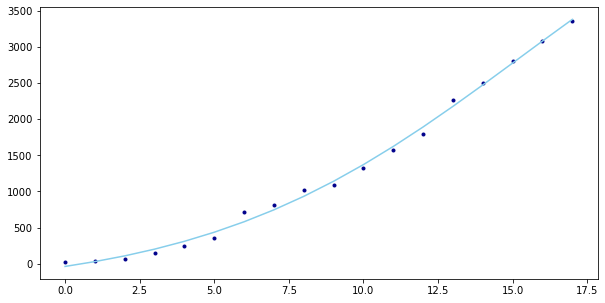

In [145]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

# build the logistic function
def logistic(x, x0, L, k):
    return L/(1 + np.exp(-k*(x-x0)))

# build the cost function to minimize the mean squared error
def log_cost(params, data):
    x0,L,k,offset = params
    pred = logistic(data.iloc[:,0], x0, L, k) + offset
    return np.mean((pred-data.iloc[:,1])**2)

# minimize the starting values given
st_params = [10,1000,0.1,-300]
plt.figure(figsize = (10,5))
res = minimize(log_cost, st_params, args = (dataset_df))
x0,L,k,offset = res.x

# predict the values, using the logistic function
pred = logistic(dataset_df.iloc[:,0], x0, L, k) + offset

# plot the logistic model and the initial values
plt.plot(dataset_df.iloc[:,0], dataset_df.iloc[:,1], ".", c = "darkblue")
plt.plot(dataset_df.iloc[:,0], pred, c = "skyblue")

In [146]:
# show the respective parameters
print("x0 = {0}, L = {1}, k  = {2}, offset = {3}".format(x0, L, k, offset))

x0 = 15.221308299993485, L = 6462.337476195807, k  = 0.18871281563114084, offset = -384.73963211296353


**Definitions:**

**x0:** The x-value, that builds the midpoint of the graph

**L:** The maximum y-value of the function

**k:** The slope factor, i.e. growth rate of the logistic curve

**offset:** The y-value, where the logistic function starts

## Question 2 (2 points out of 20)

Compute and plot the residuals of the model found. What can we tell about the model identified based on the Residual Plot? Is a logistic function a good option to model users' growth over time in our dataset?

Text(0, 0.5, 'Residual Value')

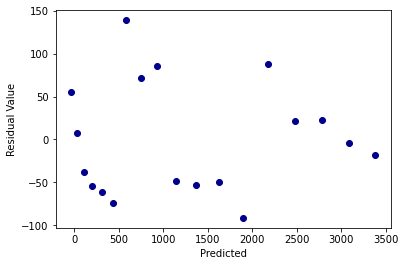

In [147]:
# define the "pred"-variable once again
pred = logistic(dataset_df.iloc[:,0],x0,L,k) + offset

# calculate the residuals and store them in a new variable
residual = dataset_df.iloc[:,1] - pred

# plot the residual values
plt.scatter(pred, residual, c = "darkblue")
plt.xlabel("Predicted")
plt.ylabel("Residual Value")

**Evaluation:** I think, that the logistic model used is a good option to model users' growth over time, since it fits the data pretty well. The greatest deviation from our data observed is a residual value of around 139 users, which is relatively low, compared to the range of values in our dataset. Also, when you think about it logically, it makes sense to use a logistic function, since the user growth has been increasing exponentially but has to flatten at some point in the future (after 2012).

## Question 3 (3 points out of 20)

Compute the 95% confidence interval for its parameters under the assumption that the random error affecting the data points comes from the same distribution for all points.

In [148]:
# define the number of replicas used in the for loop (to avoid a high execution time, I only chose 10)
replicas = 10

# build a new dataframe with the logistic parameters
parameters = pd.DataFrame(index = ["x0","L","k","offset"]) 

# build the for loop and create 10 replicas of each of the parameters
for _ in range(replicas):
    rep_data = dataset_df.copy() 
    rep_data.iloc[:,1] = pred + residual * np.random.normal(size = dataset_df.shape[0])
    res = minimize(log_cost, st_params, args = (rep_data))
    x0, L, k, offset = res.x    
    data = {"x0":x0,"L":L,"k":k,"offset":offset}
    ds_para = pd.Series(data)
    parameters = pd.concat([parameters, ds_para], axis = 1) 
    
# compute the 2.5th percentile and the 97.5 percentile from the previously built set of parameters to build the 95% confidence interval 
parameters["2.5 percentile"] = parameters.quantile(0.025, axis = 1, interpolation = "midpoint")
parameters["97.5 percentile"] = parameters.quantile(0.975, axis = 1, interpolation = "midpoint")

# print the limits of the 95% confidence interval
print("With 95% confidence...\n...x0 lies between {0} and {1}".format(parameters["2.5 percentile"][0], parameters["97.5 percentile"][0]))
print("...L lies between {0} and {1}".format(parameters["2.5 percentile"][1], parameters["97.5 percentile"][1]))
print("...k lies between {0} and {1}".format(parameters["2.5 percentile"][2], parameters["97.5 percentile"][2]))
print("...the offset lies between {0} and {1}".format(parameters["2.5 percentile"][3], parameters["97.5 percentile"][3]))

With 95% confidence...
...x0 lies between 14.135285046741474 and 15.924993922308655
...L lies between 5583.5020381403465 and 6978.276385327205
...k lies between 0.1712248584313512 and 0.21582792704620832
...the offset lies between -525.6304072825808 and -260.44520933221946
